In [1]:
import os,sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
import numpy as np
import scipy
import pandas as pd
import json
import pymongo
from IPython.display import clear_output
from itertools import chain
from collections import Counter
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta
import random as rnd
from bson import ObjectId
import matplotlib.dates as mdates
import pickle, gzip
import time
import math 
#import matplotlib.dates as 
import seaborn as sns; sns.set()

In [2]:
path_proj = os.getcwd()+ '/'
path_save = path_proj + 'csv/'
figure_save = path_proj + 'figures'

In [3]:
###Reading CSV

df_track = pd.read_csv(path_save + 'df_track.csv')# tracks' data frame
df_track_pop = pd.read_csv(path_save + 'df_track_pop.csv')#track pop time series
df_art_pop = pd.read_csv(path_save + 'df_art_pop.csv')
df_trk_play_pos = pd.read_csv(path_save + 'df_trk_play_pos.csv')#for each song(rows), its position in a given pl(col)
df_trk_dzRank = pd.read_csv(path_save + 'df_trk_dzRank.csv')
df_trk_dz_artFanN = pd.read_csv(path_save + 'df_trk_dz_artFanN.csv')
df_trk_dz_artAlbumN = pd.read_csv(path_save + 'df_trk_dz_artAlbumN.csv')

# Brief presentation of the main datasets
**df_track**: contains *static* meatadata about a set of tracks available on Spotify. To each track is assigned an unique id -*track_id* through which it's possible to combine different information stored in different dataframes.

In [4]:
df_track.head()

,id,name,type,added_at,album_id,album_name,artist_id,artist_name,disc_number,duration_ms,...,dzDuration,dzTrackPos,dzDiskN,dzBpm,dzGain,ytChannel_ref,ytChannel_id,ytVideo_title,ytVideo_releaseDate,track_id
0,003VDDA7J3Xb2ZFlNx7nIZ,YELL OH,track,2020-03-20T04:01:00Z,2orYogfKeURqyS1hRP1vZ4,YELL OH,6Xgp2XMz1fhVYe7i6yNAax,Trippie Redd,1,236779.0,...,236.0,1.0,1.0,0.0,-8.5,czqHYzx4BSc,UCEtPQSQ2BkBct_n8DIeacFQ,Trippie Redd - YELL OH (Visualizer) ft. Young ...,2020-02-07T05:00:14.000Z,003VDDA7J3Xb2ZFlNx7nIZ
1,00HxGKTPOh701Wv2gmbuA9,valentine's day,track,2020-02-10T18:00:06Z,17DTCLkdvszFaSgSv6areW,valentine's day,0duLKMlcwhyZgqu8zSSjBp,Alaina Castillo,1,188561.0,...,188.0,1.0,1.0,0.0,-7.2,rGoQrClgWe4,UCC9mbCeHappQ8IkGDULZLvw,valentine&#39;s day,2020-01-23T10:18:06.000Z,00HxGKTPOh701Wv2gmbuA9
2,00SiZEELZ0K4gkUl0rU529,Bandsville,track,2020-02-20T23:01:00Z,1oxxysQmylUXuxzSdHlqUc,Baby Gravy 2,2YOYua8FpudSEiB9s88IgQ,Yung Gravy,1,113997.0,...,113.0,1.0,1.0,0.0,-11.4,cE5sWbsqSh8,UCqmI6Kl2lS99N9-e2hkuE9A,Bandsville,2020-02-13T10:08:05.000Z,00SiZEELZ0K4gkUl0rU529
3,00WSG2jWrgq8Ln8lVLEkOr,3.5.7,track,2020-03-09T09:51:40Z,7GbL3PFtyrG8xT85SrYvms,3.5.7,4MRRW42s9ymwa5zu4xTKJh,Kaza,1,175400.0,...,175.0,1.0,1.0,0.0,-10.8,2F8Kr91wQ0U,UC_OHIiSbsFvTIXjWGMPe1mA,Kaza - 3.5.7 (Clip officiel),2020-02-07T17:40:55.000Z,00WSG2jWrgq8Ln8lVLEkOr
4,00dlNWEiPTtm1ldy6zOUlz,Cita,track,2020-03-10T16:18:32Z,701SovA1xH6bKc98mQJ3HI,Cita,3MHaV05u0io8fQbZ2XPtlC,Prince Royce,1,216347.0,...,216.0,1.0,1.0,0.0,-10.2,QigDeRTqRqI,UCphlOJ8CqfyUi9ayZ2UZmfg,Prince Royce - Cita (ALTER EGO Video),2020-01-24T05:00:04.000Z,00dlNWEiPTtm1ldy6zOUlz


**df_track_pop**: Spotify assigned to each track an integer number that quantifies the popularity of the contenti within the platform. We refer to it as the **Spotify Popularity Index** (**SPI**) and it ranges between 0 to 100: higher the index, more popular the track. In df_track_pop the evolution of this index is recorded for each track.

In [11]:
df_track_pop.head()

,2020-02-07,2020-02-08,2020-02-09,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,...,2020-02-06,2020-01-21,2020-01-22,2020-01-23,2020-01-17,2020-01-18,2020-01-19,2020-01-15,2020-01-16,track_id
0,0.0,0.0,32.0,68.0,70.0,72.0,73.0,73.0,74.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,003VDDA7J3Xb2ZFlNx7nIZ
1,58.0,58.0,58.0,58.0,58.0,58.0,58.0,58.0,59.0,59.0,...,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00HxGKTPOh701Wv2gmbuA9
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,27.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00SiZEELZ0K4gkUl0rU529
3,0.0,0.0,29.0,56.0,57.0,59.0,60.0,61.0,61.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00WSG2jWrgq8Ln8lVLEkOr
4,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,60.0,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00dlNWEiPTtm1ldy6zOUlz


In the following box it's shown how the *release date* does not coincide always with the date on which it's published on Spotify. We take as **day zero** the date for which a given song appear in a playlist for the first time. **day zero** coincides also with the first day for which the popularity is not NAN in the time series.

In [12]:
def show_k_pop(k = False):
    """
    input:
    @k: (int) number of time-series to visualize
    
    ouput:
    @dct_pop: (dictionary) keys = track_id, values = spotify populaurity index time series
    
    It plot the first k tracks' Spotify Popularity Index (SPI). If k is not specified all the time 
    series are plotted. In the same graph the average trend of the SPI over the sample is shown (red line).
    It returns a dct_pop: each key is a track_id and the associated is a the time-series retrieved from 
    df_track_pop
    """
    f = plt.subplots(1,1,figsize = (12,8))
    dct_pop = {}
    
    for _, row in df_track_pop.iterrows(): 
        spotify_popularity_series = []
        track_id = row[-1]
        for index, popularity in row[:-1].sort_index().items(): # track_id must be excluded!
            if(popularity >=0):
                spotify_popularity_series.append(popularity)
        dct_pop.update({track_id : spotify_popularity_series}) 
    
    if(not k):
        for song in dct_pop.keys():
            plt.plot(dct_pop[song])
    else:
        for track_id in list(dct_pop.keys())[:k]: #probabilmente non e' ottimale 
            plt.plot(dct_pop[track_id],color = 'k',alpha = 0.3)
    #plt.grid()
    plt.xlabel('t',fontsize = 20)#'Days after the first appearing in one playlist'
    plt.ylabel('Spotify Popularity',fontsize = 20)
    plt.xlim(0,50)
    trend = mean_success(dct_pop)
    plt.plot(trend, linewidth = 4, linestyle = '-', color = 'red')
    plt.savefig('Tesi/ImgTesi/RandomForest/timeseries.png')
    plt.show()
    return dct_pop

def mean_success(dct_pop):
    
    """
    input:
    
    @dct_pop: (dictionary) keys = track_id, values = Spotify Populaurity Index (SPI) time series.
    
    output:
    
    @trend: (list) Average trend of the SPI over the sample is shown (red line).
    
    """
    
    trend = []
    is_any_recording = True
    i = 0
    while(is_any_recording):
        all_time_series_length_i = []
        for track_id in dct_pop.keys(): #for su gli id 
            if (len(dct_pop[track_id]) >= i+1): # se un track ha una time series sufficientemente lunga, salvo il suo valore in z
                all_time_series_length_i.append(dct_pop[track_id][i]) #qui salvo tutte le time series che arrivano allo step i per poi farne la media
        if(len(all_time_series_length_i)==0): # se non riesco a trovare nulla me ne esco dal while
            is_any_recording = False
        else:
            trend.append(np.mean(np.array(all_time_series_length_i))) #altrimenti salvo in trend la media di z
            i = i+ 1 #incremento lo step
    return trend

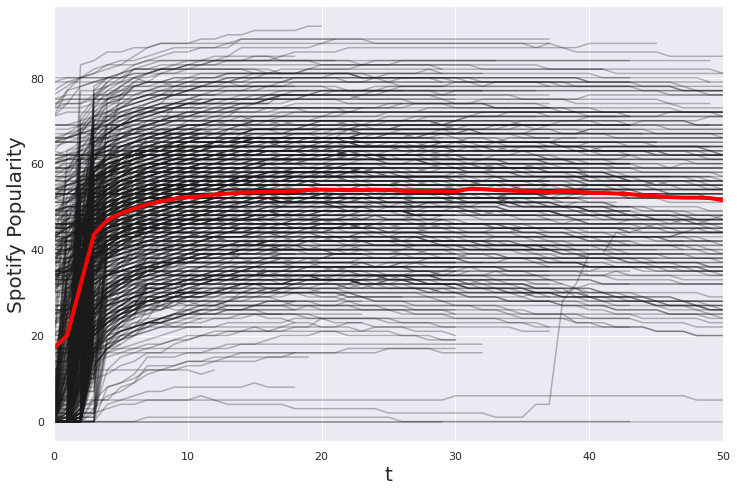

In [13]:
dct_pop = show_k_pop(800)
trend = mean_success(dct_pop)

In [14]:
def above_or_below(trend,dct_pop):
    
    """
    input:
    
    @trend: (list) Average trend of the SPI over the sample is shown (red line);
    @dct_pop: (dictionary) keys = track_id, values = Spotify Populaurity Index (SPI) time series.
    
    output:
    
    @dct_pop_ud: (dictionary) keys = track_id, values: binary list
    
    
    It returns a dictionary. Keys are track_id, values binary list. At a given day the value +1(-1) is appended to the binary list if the SPI 
    is above(below) the average trend. 
    
    """
    dct_pop_ud  = {}
    for track_id in dct_pop:
        up_down = []
        L = len(dct_pop[track_id]) #lunghezza della time series
        for i in np.arange(L):
            if (dct_pop[track_id][i] >= trend[i]):
                up_down.append(1)
            else:
                up_down.append(-1)
        dct_pop_ud.update({track_id : up_down})        
    return dct_pop_ud

In [15]:
dct_pop_ud = above_or_below(trend,dct_pop)

# day zero assumption:

To build the previous plot, we have assumed that the *day zero* - the day when a track appears on one of the selected Spotify playlists - corresponds to the moment when the popularity of the track changes from being nan to an int number. We are going to test this assumption. Let's build a dictionary, **day_zero**, whose keys are track_id and the values the date when a given track is inserted in one of the 134 unique playlists. 


In [16]:
def back_n_days(date,n):
    """
    input:
    
    @date: (string) string in the format 'Y-m-d'
    @n: (int) 
    

    It returns the string of the n-days date prior the input date
    """
    datetime_object = datetime.strptime(date, '%Y-%m-%d')
    datetime_object =datetime_object + relativedelta(days=-n)
    return datetime_object.strftime('%Y-%m-%d')

In [19]:
print(f"Number of unique playlist: {len(df_trk_play_pos.playlist_id.drop_duplicates())}")

Number of unique playlist: 134


In [37]:
df = df_trk_play_pos
day_zero ={} # dizionario id_track --> primo giorno in una qualsiasi playlist
days_list = [datetime.strptime(d, "%Y-%m-%d") for d in df.columns if d[0] == '2'] # if d[0] == '2' avoids to parse 'track_id' and 'playlist_id'
days_list.sort() #ordino le date come oggetto data
days_list = [datetime.strftime(d,'%Y-%m-%d') for d in days_list] #sorted list of strings
for index,row in df.iterrows():
    track_id = row['track_id'] # track_id current track
    for day in days_list: #for loop sorted list
        if(not math.isnan(row[day])): #if the track is present inside the playlist at a given day
            if(track_id in day_zero and not math.isnan(day_zero[track_id])): #se l'id e' gia presente nel dizionario salvata con una vera data
                update_day_zero = min(day,day_zero[track_id]) #devo fare un update
                day_zero[track_id] = update_day_zero
                break
            else: # altrimenti salvo direttamente il giorno attuale nel dizionario day_zero
                day_zero[track_id] = day
                break
        day_zero[track_id] = np.nan
df_day_zero = pd.DataFrame.from_dict(day_zero,orient = 'index').reset_index().rename(columns={'index' : 'track_id',0:'day_zero'})
df_track = df_track.merge(df_day_zero,on = 'track_id') # merging df to add the feature *day zero*

Check: % tracks whose SPI time-series starts at day-0

In [41]:
start_at_day_zero = 0
for key in day_zero:
    day = day_zero[key]
    yesterday = back_n_days(day,1)
    #print(day,backNdays(day,1))
    if(df_track_pop.loc[df_track_pop['track_id'] == key,day].values[0]>=0):
        
        if(yesterday not in df_track_pop.columns 
           or math.isnan(df_track_pop.loc[df_track_pop['track_id'] == key,yesterday].values[0]) 
           or df_track_pop.loc[df_track_pop['track_id'] == key,yesterday].values[0] ==0):
            start_at_day_zero += 1

print(f"% tracks whose popularity time-series starts at day_0: {start_at_day_zero/len(day_zero)*100} %")

% tracks whose popularity time-series starts at day_0: 93.60284318080852 %


In [42]:
print(f"Tracks whose release_date is before day_zero: {(df_track.release_date > df_track.day_zero).sum()}")
df_track[df_track.release_date > df_track.day_zero][['name','artist_name','release_date','day_zero']]


Tracks whose release_date is before day_zero: 7


,name,artist_name,release_date,day_zero
234,Beverly,Gullen,2020-02-21,2020-02-12
288,You Are,Pat Metheny,2020-02-21,2020-01-15
751,FREE BIA (1ST DAY OUT),BIA,2020-03-27,2020-03-20
764,Sinking Walls,Gullen,2020-02-21,2020-02-12
799,Origami,Otilia,2020-01-17,2020-01-16
1534,High Right Now (feat. Wiz Khalifa) - Remix,Tyla Yaweh,2020-01-31,2020-01-25
1757,Wide and Far,Pat Metheny,2020-02-21,2020-01-24


## Adding 'weekly popularity' columns to df_track

we assign to each track of the data-set a binary
variable φ = 0,1: if during the first week the track has a popularity greater than
the average value then φ = 1, otherwise φ = 0. If during the first week the index
results to be above the red line for some days and below for the remaining days,
the variable φ is assigned just on a majority criterion.

In [43]:
def add_pop(df,df_art_pop): 
    
    """
    @df: (pandas df) any pandas dataframe
    @df_art_pop: (pandas df) pandas dataframe storing the evolution of the popularity of the artist within the Spotify
    
    
    It returns df with a column more 'artist_popularity' storing the popularity of the artist on the 'release_date'. 
    If such information is not available, we try to get the value of popularity from previous date, starting from the
    the day before the 'release date' and going backward (the future is neglected).
    
    """
    df['artist_popularity'] = 0 
    for index, row in df.iterrows():
        
        art_id = row['artist_id'] #saving artist_id associated to a given track
        release_date = df.loc[index,'release_date'] #saving the release_date of a given track
        absent_column = not(release_date in df_art_pop.columns) #is release_date present as columns in df_art_pop
        is_nan = True
        update_done = False
        while(absent_column or is_nan): #while the release date is absent OR the pop at that date is a nan...
            if(release_date < '2020-01-15'): #...check first that release_date is bigger than the oldest date
                is_nan = False
                absent_column = False 
                df.loc[index,['artist_popularity']] = np.nan #if the track was published before 2020-01-15 put nan as popolarity at time 0
                update_done = True #save that an update has been done
            elif(not absent_column): # if the column is present must check that for some reasons you don't have a nan
                is_nan = math.isnan(df_art_pop.loc[df_art_pop['artist_id'] == art_id].iloc[0][release_date])
                if(is_nan): #if there is a nan go back 1 day
                    release_date = back_n_days(release_date,1)
                    absent_column = not(release_date in df_art_pop.columns) #... Is there a column               
                else: #non ho nan
                    is_nan = False
            else: #the date is not present as column
                release_date = back_n_days(release_date,1)
                absent_column = not(release_date in df_art_pop.columns)
        if(not update_done):
            df.loc[index,['artist_popularity']] = df_art_pop.loc[df_art_pop['artist_id'] == art_id].iloc[0][release_date]
    return df

def coarse_grain(n_week,bin_array):
    
    """
    input:
    
    @n_week: (int) number of full week
    @bin_array: (list) binary list (see above_or_below)
    
    output:
    
    @month: (list) 4-entries array
    
    The daily relative popularity of a track encoded in bin_array is coarsed on a week scale. 
    If on average (during 7 days) the SPI is above the average, a $+1$ is assigned to corresponding week.
    For short recordings a nan is assigned by default to weeks with no records.
    """
    
    bin_array = np.array(bin_array)
    month = np.array([np.nan for k in np.arange(4)])
    for i in np.arange(n_week):
        if (np.mean(bin_array[i*7:7*(i+1)]) >=0):
            month[i] = 1
        else:
            month[i] = -1
    return month

def update_df_track(dct_pop_ud,df_track):
    
    """
    input:
    
    @dct_pop_ud: (dictionary) keys -> track_id ; values -> values binary list. 
    At a given day the value +1(-1) is appended to the binary list if the SPI 
    is above(below) the average trend. 
    @df_track: (pandas df) dataframe matadata tracks spotify
    
    output:
    
    @df_track: (pandas df) 4-entries array
    
    4 columns are added to the dataframe df_track, one for each week after the day zero indicating the popularity of a given track
    in comparison with the trend of the sample. 
    """
    
    
    
    df_track['1week'] = ''
    df_track['2week'] = ''
    df_track['3week'] = ''
    df_track['4week'] = ''

    index = 0
    for track_id in dct_pop_ud:
        month =np.array([np.nan for k in np.arange(4)])
        if(len(dct_pop_ud[track_id])>=28): #4 week of data
            month = coarse_grain(4,dct_pop_ud[track_id])
        elif(len(dct_pop_ud[track_id])>=21): #3 week of data
            month = coarse_grain(3,dct_pop_ud[track_id])
        elif(len(dct_pop_ud[track_id])>=14): #2 week of data
            month = coarse_grain(2,dct_pop_ud[track_id])
        elif(len(dct_pop_ud[track_id])>=7): #1 week of data
            month = coarse_grain(1,dct_pop_ud[track_id])
        df_track['1week'][index] = month[0]
        df_track['2week'][index] = month[1]
        df_track['3week'][index] = month[2]
        df_track['4week'][index] = month[3]
        index +=1
    return df_track


In [46]:
#adding columns about week pop and the artist pop at the release date
df_track = update_df_track(dct_pop_ud,df_track)
df_track = add_pop(df_track, df_art_pop)

<ipython-input-43-420b7f00a3bb>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track['1week'][index] = month[0]
<ipython-input-43-420b7f00a3bb>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track['2week'][index] = month[1]
<ipython-input-43-420b7f00a3bb>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_track['3week'][index] = month[2]
<ipython-input-43-420b7f00a3bb>:106: SettingWithCopyWarning: 
A value is trying to

# Adding information from Deezer dataframes

For each track in df_track I want to add
<ul>
<li>Deezer rank @ released day on Deezer</li>
<li>Number of album of the artist on deezer @ released day on Deezer</li>
<li>Artsist's number of fun @ released day on Deezer</li>
</ul>

In [50]:
#adding some info from deezer
n_rows = df_track.shape[0] #number of rows of df_track pandas df

dzRank_list = []
dzAlbumN_list = []
dzArtFan_list = []

features_list = [dzRank_list,dzArtFan_list,dzAlbumN_list]
dz_id_list = df_trk_dzRank['track_id'].values 

df_list = [df_trk_dzRank,df_trk_dz_artFanN,df_trk_dz_artAlbumN] #list of the pandas df we want to fetch info from
available_days_list = [] #each dataframe may miss different sets of day of recording

for df in df_list:    
    days_list = [datetime.strptime(d, "%Y-%m-%d") for d in df.columns if d[0] == '2']
    days_list.sort()
    available_days_list.append([datetime.strftime(d,'%Y-%m-%d') for d in days_list])  # for each dataframe i save the days of recording available

for i in range(n_rows): #loop for on rows of df_track
    dz_release_date = df_track.loc[i,'dzRelDate'] # 
    track_id = df_track.loc[i,'id']
    if(type(dz_release_date) == str and df_track.loc[i,'day_zero'] >= dz_release_date and track_id in dz_id_list ): #
        for feature,df,dz_available_days in zip(features_list, df_list, available_days_list): 
            day_zero = dz_release_date #day_zero is updated                  
            while(not(day_zero in dz_available_days) and day_zero > dz_available_days[0]):
                day_zero = back_n_days(day_zero,1)
            if(day_zero >= dz_available_days[0]):
                feature.append(df.loc[df['track_id'] == track_id][day_zero].values[0])
            else:
                feature.append(np.nan)
    else:
        for feature in features_list:
            feature.append(np.nan)
dzRank_series = pd.Series(features_list[0])
dzArtFanN_series = pd.Series(features_list[1])
dzAlbumN_series = pd.Series(features_list[2])
df_track.insert(df_track.shape[1],'dzRank',dzRank_series)
df_track.insert(df_track.shape[1],'dzArtFanN',dzArtFanN_series)
df_track.insert(df_track.shape[1],'dzAlbumN',dzAlbumN_series)
        

In [51]:
df_track.to_csv(path_save + 'df_track+.csv') #saving CSV with new fields